In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Cat.zip -d /content/sample_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/Cat/55.jpg  
  inflating: /content/sample_data/Cat/550.jpg  
  inflating: /content/sample_data/Cat/5500.jpg  
  inflating: /content/sample_data/Cat/5501.jpg  
  inflating: /content/sample_data/Cat/5502.jpg  
  inflating: /content/sample_data/Cat/5503.jpg  
  inflating: /content/sample_data/Cat/5504.jpg  
  inflating: /content/sample_data/Cat/5505.jpg  
  inflating: /content/sample_data/Cat/5506.jpg  
  inflating: /content/sample_data/Cat/5507.jpg  
  inflating: /content/sample_data/Cat/5508.jpg  
  inflating: /content/sample_data/Cat/5509.jpg  
  inflating: /content/sample_data/Cat/551.jpg  
  inflating: /content/sample_data/Cat/5510.jpg  
  inflating: /content/sample_data/Cat/5511.jpg  
  inflating: /content/sample_data/Cat/5512.jpg  
  inflating: /content/sample_data/Cat/5513.jpg  
  inflating: /content/sample_data/Cat/5514.jpg  
  inflating: /content/sample_data/Cat/5515.jpg  
  inflating: /content/

In [ ]:
!unzip /content/drive/MyDrive/Dog.zip -d /content/sample_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/Dog/550.jpg  
  inflating: /content/sample_data/Dog/5500.jpg  
  inflating: /content/sample_data/Dog/5501.jpg  
  inflating: /content/sample_data/Dog/5502.jpg  
  inflating: /content/sample_data/Dog/5503.jpg  
  inflating: /content/sample_data/Dog/5504.jpg  
  inflating: /content/sample_data/Dog/5505.jpg  
  inflating: /content/sample_data/Dog/5506.jpg  
  inflating: /content/sample_data/Dog/5507.jpg  
  inflating: /content/sample_data/Dog/5508.jpg  
  inflating: /content/sample_data/Dog/5509.jpg  
  inflating: /content/sample_data/Dog/551.jpg  
  inflating: /content/sample_data/Dog/5510.jpg  
  inflating: /content/sample_data/Dog/5511.jpg  
  inflating: /content/sample_data/Dog/5512.jpg  
  inflating: /content/sample_data/Dog/5513.jpg  
  inflating: /content/sample_data/Dog/5514.jpg  
  inflating: /content/sample_data/Dog/5515.jpg  
  inflating: /content/sample_data/Dog/5516.jpg  
  inflating: /conten

In [ ]:

Rebuild_data = True

class cat_dog():

  cat = '/content/sample_data/Cat'
  dog = '/content/sample_data/Dog'
  label = {cat: 0 , dog: 1 }
  training_data = []
  cat_count = 0
  dog_count = 0
  IMG_SIZE = 50

  def make_training_data(self):
    for label in self.label:
      print(label)
      for f in tqdm(os.listdir(label)):
        try:
            path = os.path.join(label, f)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
            # Ensure the image data is a NumPy array with the correct shape
            img = np.array(img).reshape(self.IMG_SIZE, self.IMG_SIZE, 1)
            self.training_data.append([np.array(img), np.array(np.eye(2)[self.label[label]])]) # Convert each element to a NumPy array
            if label == self.cat:
              self.cat_count += 1
            elif label == self.dog:
              self.dog_count += 1

        except Exception as e:
            pass
    np.random.shuffle(self.training_data)
    # Convert training_data to a NumPy array before saving
    # np.save('training_data.npy', self.training_data) # Removed this line to prevent the error and allow inspection of training_data
    print('Cats:', self.cat_count)
    print('Dogs:', self.dog_count)
    return self.training_data # Return training_data for inspection

if Rebuild_data:
  cat_dog = cat_dog()
  training_data = cat_dog.make_training_data() # Assign the returned value to training_data
  print(len(training_data)) # Check the length of training_data
  print(training_data[0][0].shape) # Check the shape of the first image
  print(training_data[0][1].shape) # Check the shape of the first label

/content/sample_data/Cat


100%|██████████| 12501/12501 [00:09<00:00, 1311.15it/s]


/content/sample_data/Dog


100%|██████████| 12501/12501 [00:10<00:00, 1218.53it/s]

Cats: 12476
Dogs: 12470
24946
(50, 50, 1)
(2,)


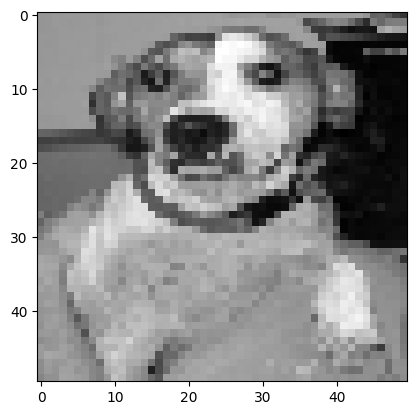

In [ ]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

In [ ]:
class model (nn.Module):

  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.conv3 = nn.Conv2d(64, 128, 5)
    x = torch.randn(50,50).view(-1,1,50,50)
    self._to_linear = None
    self.convs(x)
    self.fc1 = nn.Linear(self._to_linear, 512)
    self.fc2 = nn.Linear(512, 2)

  def convs(self , x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
    print(x[0].shape)

    if self._to_linear is None:
      self._to_linear = x[0].shape[0]*x[0].shape[1]*x[0].shape[2]
    return x

  def forward(self, x):
    x = self.convs(x)
    x = x.view(-1, self._to_linear)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.softmax(x, dim=1)


In [ ]:
model = model()

torch.Size([128, 2, 2])


In [ ]:
import torch.optim as optim

# Define the optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss = nn.MSELoss()
x = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
x = x/255.0
y = torch.Tensor([i[1] for i in training_data])

val_pct = 0.1
val_size = int(len(x)*val_pct)
print(val_size)

<ipython-input-10-154182c395f5>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  x = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)


2494


In [ ]:
train_x = x[:-val_size]
train_y = y[:-val_size]

test_x = x[-val_size:]
test_y = y[-val_size:]

print(len(train_x), len(test_x))


22452 2494


In [ ]:

batch_size = 100
epochs = 3
loss_fn = nn.MSELoss() # Assign the loss function to a new variable

for epoch in range(epochs):
  for i in tqdm(range(0, len(train_x), batch_size)):
    #print(i , i+batch_size)
    batch_x = train_x[i:i+batch_size].view(-1,1,50,50)
    batch_y = train_y[i:i+batch_size]
    model.zero_grad()
    outputs = model(batch_x)
    loss_value = loss_fn(outputs, batch_y) # Use the new variable for loss calculation
    loss_value.backward()
    optimizer.step()
print(loss_value) # Print the calculated loss value

  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])


  0%|          | 1/225 [00:00<03:19,  1.12it/s]

torch.Size([128, 2, 2])


  1%|          | 2/225 [00:01<02:18,  1.61it/s]

torch.Size([128, 2, 2])


  1%|▏         | 3/225 [00:01<01:55,  1.93it/s]

torch.Size([128, 2, 2])


  2%|▏         | 4/225 [00:02<01:48,  2.04it/s]

torch.Size([128, 2, 2])


  2%|▏         | 5/225 [00:02<01:41,  2.16it/s]

torch.Size([128, 2, 2])


  3%|▎         | 6/225 [00:02<01:36,  2.26it/s]

torch.Size([128, 2, 2])


  3%|▎         | 7/225 [00:03<01:34,  2.31it/s]

torch.Size([128, 2, 2])


  4%|▎         | 8/225 [00:03<01:32,  2.35it/s]

torch.Size([128, 2, 2])


  4%|▍         | 9/225 [00:04<01:30,  2.38it/s]

torch.Size([128, 2, 2])


  4%|▍         | 10/225 [00:04<01:29,  2.40it/s]

torch.Size([128, 2, 2])


  5%|▍         | 11/225 [00:05<01:27,  2.43it/s]

torch.Size([128, 2, 2])


  5%|▌         | 12/225 [00:05<01:27,  2.43it/s]

torch.Size([128, 2, 2])


  6%|▌         | 13/225 [00:05<01:27,  2.43it/s]

torch.Size([128, 2, 2])


  6%|▌         | 14/225 [00:06<01:27,  2.41it/s]

torch.Size([128, 2, 2])


  7%|▋         | 15/225 [00:06<01:26,  2.42it/s]

torch.Size([128, 2, 2])


  7%|▋         | 16/225 [00:07<01:26,  2.43it/s]

torch.Size([128, 2, 2])


  8%|▊         | 17/225 [00:07<01:25,  2.43it/s]

torch.Size([128, 2, 2])


  8%|▊         | 18/225 [00:07<01:24,  2.46it/s]

torch.Size([128, 2, 2])


  8%|▊         | 19/225 [00:08<01:23,  2.47it/s]

torch.Size([128, 2, 2])


  9%|▉         | 20/225 [00:08<01:22,  2.48it/s]

torch.Size([128, 2, 2])


  9%|▉         | 21/225 [00:09<01:21,  2.50it/s]

torch.Size([128, 2, 2])


 10%|▉         | 22/225 [00:09<01:22,  2.47it/s]

torch.Size([128, 2, 2])


 10%|█         | 23/225 [00:09<01:21,  2.47it/s]

torch.Size([128, 2, 2])


 11%|█         | 24/225 [00:10<01:20,  2.48it/s]

torch.Size([128, 2, 2])


 11%|█         | 25/225 [00:10<01:20,  2.49it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 26/225 [00:11<01:33,  2.14it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 27/225 [00:11<01:44,  1.89it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 28/225 [00:12<01:52,  1.76it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:55,  1.69it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 30/225 [00:14<02:01,  1.60it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 31/225 [00:14<02:01,  1.60it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 32/225 [00:15<01:46,  1.80it/s]

torch.Size([128, 2, 2])


 15%|█▍        | 33/225 [00:15<01:37,  1.97it/s]

torch.Size([128, 2, 2])


 15%|█▌        | 34/225 [00:15<01:31,  2.08it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 35/225 [00:16<01:27,  2.17it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 36/225 [00:16<01:24,  2.24it/s]

torch.Size([128, 2, 2])


 16%|█▋        | 37/225 [00:17<01:20,  2.33it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 38/225 [00:17<01:18,  2.38it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 39/225 [00:17<01:18,  2.37it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 40/225 [00:18<01:16,  2.41it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 41/225 [00:18<01:15,  2.42it/s]

torch.Size([128, 2, 2])


 19%|█▊        | 42/225 [00:19<01:14,  2.47it/s]

torch.Size([128, 2, 2])


 19%|█▉        | 43/225 [00:19<01:12,  2.50it/s]

torch.Size([128, 2, 2])


 20%|█▉        | 44/225 [00:19<01:12,  2.48it/s]

torch.Size([128, 2, 2])


 20%|██        | 45/225 [00:20<01:11,  2.50it/s]

torch.Size([128, 2, 2])


 20%|██        | 46/225 [00:20<01:11,  2.50it/s]

torch.Size([128, 2, 2])


 21%|██        | 47/225 [00:21<01:10,  2.51it/s]

torch.Size([128, 2, 2])


 21%|██▏       | 48/225 [00:21<01:10,  2.52it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 49/225 [00:21<01:10,  2.50it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 50/225 [00:22<01:09,  2.51it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 51/225 [00:22<01:08,  2.53it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 52/225 [00:23<01:08,  2.52it/s]

torch.Size([128, 2, 2])


 24%|██▎       | 53/225 [00:23<01:07,  2.53it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 54/225 [00:23<01:08,  2.49it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 55/225 [00:24<01:09,  2.45it/s]

torch.Size([128, 2, 2])


 25%|██▍       | 56/225 [00:24<01:12,  2.32it/s]

torch.Size([128, 2, 2])


 25%|██▌       | 57/225 [00:25<01:23,  2.02it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 58/225 [00:26<01:30,  1.85it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 59/225 [00:26<01:33,  1.77it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 60/225 [00:27<01:38,  1.67it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 61/225 [00:28<01:43,  1.58it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 62/225 [00:28<01:39,  1.63it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 63/225 [00:29<01:28,  1.83it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 64/225 [00:29<01:19,  2.01it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 65/225 [00:29<01:14,  2.15it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 66/225 [00:30<01:11,  2.24it/s]

torch.Size([128, 2, 2])


 30%|██▉       | 67/225 [00:30<01:08,  2.29it/s]

torch.Size([128, 2, 2])


 30%|███       | 68/225 [00:30<01:06,  2.38it/s]

torch.Size([128, 2, 2])


 31%|███       | 69/225 [00:31<01:04,  2.41it/s]

torch.Size([128, 2, 2])


 31%|███       | 70/225 [00:31<01:03,  2.43it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 71/225 [00:32<01:04,  2.38it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 72/225 [00:32<01:03,  2.40it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 73/225 [00:33<01:02,  2.43it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 74/225 [00:33<01:01,  2.44it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 75/225 [00:33<01:01,  2.44it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 76/225 [00:34<01:01,  2.41it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 77/225 [00:34<01:00,  2.46it/s]

torch.Size([128, 2, 2])


 35%|███▍      | 78/225 [00:35<00:59,  2.48it/s]

torch.Size([128, 2, 2])


 35%|███▌      | 79/225 [00:35<00:59,  2.47it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 80/225 [00:35<00:58,  2.47it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 81/225 [00:36<00:58,  2.46it/s]

torch.Size([128, 2, 2])


 36%|███▋      | 82/225 [00:36<00:57,  2.47it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 83/225 [00:37<00:57,  2.47it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 84/225 [00:37<00:57,  2.46it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 85/225 [00:37<00:56,  2.48it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 86/225 [00:38<00:55,  2.53it/s]

torch.Size([128, 2, 2])


 39%|███▊      | 87/225 [00:38<01:00,  2.26it/s]

torch.Size([128, 2, 2])


 39%|███▉      | 88/225 [00:39<01:08,  2.00it/s]

torch.Size([128, 2, 2])


 40%|███▉      | 89/225 [00:40<01:12,  1.87it/s]

torch.Size([128, 2, 2])


 40%|████      | 90/225 [00:40<01:16,  1.77it/s]

torch.Size([128, 2, 2])


 40%|████      | 91/225 [00:41<01:19,  1.68it/s]

torch.Size([128, 2, 2])


 41%|████      | 92/225 [00:42<01:23,  1.59it/s]

torch.Size([128, 2, 2])


 41%|████▏     | 93/225 [00:42<01:16,  1.72it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 94/225 [00:42<01:08,  1.90it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 95/225 [00:43<01:03,  2.05it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 96/225 [00:43<01:00,  2.15it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 97/225 [00:44<00:57,  2.23it/s]

torch.Size([128, 2, 2])


 44%|████▎     | 98/225 [00:44<00:55,  2.29it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 99/225 [00:45<00:54,  2.30it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 100/225 [00:45<00:53,  2.35it/s]

torch.Size([128, 2, 2])


 45%|████▍     | 101/225 [00:45<00:53,  2.33it/s]

torch.Size([128, 2, 2])


 45%|████▌     | 102/225 [00:46<00:50,  2.42it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 103/225 [00:46<00:50,  2.43it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 104/225 [00:47<00:50,  2.40it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 105/225 [00:47<00:48,  2.46it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 106/225 [00:47<00:49,  2.41it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 107/225 [00:48<00:48,  2.44it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 108/225 [00:48<00:48,  2.42it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 109/225 [00:49<00:47,  2.45it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 110/225 [00:49<00:46,  2.46it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 111/225 [00:49<00:46,  2.44it/s]

torch.Size([128, 2, 2])


 50%|████▉     | 112/225 [00:50<00:46,  2.43it/s]

torch.Size([128, 2, 2])


 50%|█████     | 113/225 [00:50<00:45,  2.45it/s]

torch.Size([128, 2, 2])


 51%|█████     | 114/225 [00:51<00:45,  2.46it/s]

torch.Size([128, 2, 2])


 51%|█████     | 115/225 [00:51<00:44,  2.48it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 116/225 [00:51<00:44,  2.46it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 117/225 [00:52<00:43,  2.49it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 118/225 [00:52<00:50,  2.12it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 119/225 [00:53<00:56,  1.89it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 120/225 [00:54<00:59,  1.78it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 121/225 [00:54<01:01,  1.70it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 122/225 [00:55<01:03,  1.62it/s]

torch.Size([128, 2, 2])


 55%|█████▍    | 123/225 [00:56<01:05,  1.55it/s]

torch.Size([128, 2, 2])


 55%|█████▌    | 124/225 [00:56<00:58,  1.74it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 125/225 [00:57<00:52,  1.90it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 126/225 [00:57<00:48,  2.05it/s]

torch.Size([128, 2, 2])


 56%|█████▋    | 127/225 [00:57<00:45,  2.16it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 128/225 [00:58<00:43,  2.22it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 129/225 [00:58<00:42,  2.28it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 130/225 [00:59<00:40,  2.32it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 131/225 [00:59<00:39,  2.35it/s]

torch.Size([128, 2, 2])


 59%|█████▊    | 132/225 [01:00<00:39,  2.37it/s]

torch.Size([128, 2, 2])


 59%|█████▉    | 133/225 [01:00<00:38,  2.36it/s]

torch.Size([128, 2, 2])


 60%|█████▉    | 134/225 [01:00<00:38,  2.38it/s]

torch.Size([128, 2, 2])


 60%|██████    | 135/225 [01:01<00:37,  2.42it/s]

torch.Size([128, 2, 2])


 60%|██████    | 136/225 [01:01<00:37,  2.40it/s]

torch.Size([128, 2, 2])


 61%|██████    | 137/225 [01:02<00:36,  2.44it/s]

torch.Size([128, 2, 2])


 61%|██████▏   | 138/225 [01:02<00:36,  2.37it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 139/225 [01:02<00:35,  2.39it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 140/225 [01:03<00:35,  2.37it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 141/225 [01:03<00:34,  2.40it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 142/225 [01:04<00:34,  2.43it/s]

torch.Size([128, 2, 2])


 64%|██████▎   | 143/225 [01:04<00:34,  2.39it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 144/225 [01:04<00:32,  2.46it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 145/225 [01:05<00:32,  2.43it/s]

torch.Size([128, 2, 2])


 65%|██████▍   | 146/225 [01:05<00:32,  2.45it/s]

torch.Size([128, 2, 2])


 65%|██████▌   | 147/225 [01:06<00:31,  2.48it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 148/225 [01:06<00:34,  2.21it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 149/225 [01:07<00:38,  1.97it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 150/225 [01:08<00:40,  1.83it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 151/225 [01:08<00:42,  1.75it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 152/225 [01:09<00:43,  1.66it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 153/225 [01:10<00:46,  1.55it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 154/225 [01:10<00:42,  1.67it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 155/225 [01:10<00:37,  1.86it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 156/225 [01:11<00:33,  2.03it/s]

torch.Size([128, 2, 2])


 70%|██████▉   | 157/225 [01:11<00:31,  2.13it/s]

torch.Size([128, 2, 2])


 70%|███████   | 158/225 [01:12<00:30,  2.22it/s]

torch.Size([128, 2, 2])


 71%|███████   | 159/225 [01:12<00:28,  2.31it/s]

torch.Size([128, 2, 2])


 71%|███████   | 160/225 [01:12<00:27,  2.35it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 161/225 [01:13<00:26,  2.40it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 162/225 [01:13<00:26,  2.42it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 163/225 [01:14<00:25,  2.44it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 164/225 [01:14<00:24,  2.45it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 165/225 [01:14<00:24,  2.46it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 166/225 [01:15<00:23,  2.48it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 167/225 [01:15<00:23,  2.46it/s]

torch.Size([128, 2, 2])


 75%|███████▍  | 168/225 [01:16<00:22,  2.50it/s]

torch.Size([128, 2, 2])


 75%|███████▌  | 169/225 [01:16<00:22,  2.50it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 170/225 [01:16<00:21,  2.52it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 171/225 [01:17<00:21,  2.53it/s]

torch.Size([128, 2, 2])


 76%|███████▋  | 172/225 [01:17<00:20,  2.53it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 173/225 [01:18<00:20,  2.51it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 174/225 [01:18<00:20,  2.47it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 175/225 [01:18<00:20,  2.48it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 176/225 [01:19<00:19,  2.48it/s]

torch.Size([128, 2, 2])


 79%|███████▊  | 177/225 [01:19<00:19,  2.50it/s]

torch.Size([128, 2, 2])


 79%|███████▉  | 178/225 [01:20<00:18,  2.48it/s]

torch.Size([128, 2, 2])


 80%|███████▉  | 179/225 [01:20<00:20,  2.23it/s]

torch.Size([128, 2, 2])


 80%|████████  | 180/225 [01:21<00:22,  1.98it/s]

torch.Size([128, 2, 2])


 80%|████████  | 181/225 [01:22<00:24,  1.82it/s]

torch.Size([128, 2, 2])


 81%|████████  | 182/225 [01:22<00:24,  1.77it/s]

torch.Size([128, 2, 2])


 81%|████████▏ | 183/225 [01:23<00:24,  1.70it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 184/225 [01:23<00:25,  1.60it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 185/225 [01:24<00:23,  1.69it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 186/225 [01:24<00:20,  1.87it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 187/225 [01:25<00:19,  1.98it/s]

torch.Size([128, 2, 2])


 84%|████████▎ | 188/225 [01:25<00:17,  2.12it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 189/225 [01:26<00:16,  2.23it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 190/225 [01:26<00:15,  2.27it/s]

torch.Size([128, 2, 2])


 85%|████████▍ | 191/225 [01:26<00:14,  2.35it/s]

torch.Size([128, 2, 2])


 85%|████████▌ | 192/225 [01:27<00:13,  2.37it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 193/225 [01:27<00:13,  2.41it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 194/225 [01:28<00:12,  2.46it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 195/225 [01:28<00:12,  2.49it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 196/225 [01:28<00:11,  2.51it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 197/225 [01:29<00:11,  2.51it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 198/225 [01:29<00:10,  2.57it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 199/225 [01:30<00:10,  2.56it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 200/225 [01:30<00:09,  2.51it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 201/225 [01:30<00:09,  2.53it/s]

torch.Size([128, 2, 2])


 90%|████████▉ | 202/225 [01:31<00:09,  2.52it/s]

torch.Size([128, 2, 2])


 90%|█████████ | 203/225 [01:31<00:08,  2.53it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 204/225 [01:32<00:08,  2.52it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 205/225 [01:32<00:08,  2.44it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 206/225 [01:32<00:07,  2.50it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 207/225 [01:33<00:07,  2.51it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 208/225 [01:33<00:06,  2.46it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 209/225 [01:34<00:06,  2.52it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 210/225 [01:34<00:06,  2.27it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 211/225 [01:35<00:06,  2.02it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 212/225 [01:35<00:07,  1.84it/s]

torch.Size([128, 2, 2])


 95%|█████████▍| 213/225 [01:36<00:06,  1.78it/s]

torch.Size([128, 2, 2])


 95%|█████████▌| 214/225 [01:37<00:06,  1.66it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 215/225 [01:37<00:06,  1.60it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 216/225 [01:38<00:05,  1.69it/s]

torch.Size([128, 2, 2])


 96%|█████████▋| 217/225 [01:38<00:04,  1.87it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 218/225 [01:39<00:03,  2.05it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 219/225 [01:39<00:02,  2.16it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 220/225 [01:40<00:02,  2.24it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 221/225 [01:40<00:01,  2.31it/s]

torch.Size([128, 2, 2])


 99%|█████████▊| 222/225 [01:40<00:01,  2.34it/s]

torch.Size([128, 2, 2])


 99%|█████████▉| 223/225 [01:41<00:00,  2.40it/s]

torch.Size([128, 2, 2])


100%|██████████| 225/225 [01:41<00:00,  2.21it/s]


torch.Size([128, 2, 2])


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])


  0%|          | 1/225 [00:00<01:35,  2.34it/s]

torch.Size([128, 2, 2])


  1%|          | 2/225 [00:00<01:31,  2.45it/s]

torch.Size([128, 2, 2])


  1%|▏         | 3/225 [00:01<01:29,  2.47it/s]

torch.Size([128, 2, 2])


  2%|▏         | 4/225 [00:01<01:29,  2.46it/s]

torch.Size([128, 2, 2])


  2%|▏         | 5/225 [00:02<01:29,  2.47it/s]

torch.Size([128, 2, 2])


  3%|▎         | 6/225 [00:02<01:29,  2.44it/s]

torch.Size([128, 2, 2])


  3%|▎         | 7/225 [00:02<01:28,  2.47it/s]

torch.Size([128, 2, 2])


  4%|▎         | 8/225 [00:03<01:28,  2.46it/s]

torch.Size([128, 2, 2])


  4%|▍         | 9/225 [00:03<01:27,  2.47it/s]

torch.Size([128, 2, 2])


  4%|▍         | 10/225 [00:04<01:27,  2.47it/s]

torch.Size([128, 2, 2])


  5%|▍         | 11/225 [00:04<01:27,  2.45it/s]

torch.Size([128, 2, 2])


  5%|▌         | 12/225 [00:04<01:25,  2.48it/s]

torch.Size([128, 2, 2])


  6%|▌         | 13/225 [00:05<01:26,  2.45it/s]

torch.Size([128, 2, 2])


  6%|▌         | 14/225 [00:05<01:25,  2.46it/s]

torch.Size([128, 2, 2])


  7%|▋         | 15/225 [00:06<01:25,  2.47it/s]

torch.Size([128, 2, 2])


  7%|▋         | 16/225 [00:06<01:30,  2.30it/s]

torch.Size([128, 2, 2])


  8%|▊         | 17/225 [00:07<01:43,  2.02it/s]

torch.Size([128, 2, 2])


  8%|▊         | 18/225 [00:07<01:51,  1.86it/s]

torch.Size([128, 2, 2])


  8%|▊         | 19/225 [00:08<01:56,  1.76it/s]

torch.Size([128, 2, 2])


  9%|▉         | 20/225 [00:09<01:59,  1.71it/s]

torch.Size([128, 2, 2])


  9%|▉         | 21/225 [00:09<02:06,  1.61it/s]

torch.Size([128, 2, 2])


 10%|▉         | 22/225 [00:10<01:58,  1.71it/s]

torch.Size([128, 2, 2])


 10%|█         | 23/225 [00:10<01:45,  1.92it/s]

torch.Size([128, 2, 2])


 11%|█         | 24/225 [00:11<01:37,  2.06it/s]

torch.Size([128, 2, 2])


 11%|█         | 25/225 [00:11<01:32,  2.16it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 26/225 [00:11<01:27,  2.28it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 27/225 [00:12<01:24,  2.35it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 28/225 [00:12<01:23,  2.36it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:21,  2.42it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 30/225 [00:13<01:20,  2.41it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 31/225 [00:13<01:19,  2.44it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 32/225 [00:14<01:17,  2.49it/s]

torch.Size([128, 2, 2])


 15%|█▍        | 33/225 [00:14<01:17,  2.49it/s]

torch.Size([128, 2, 2])


 15%|█▌        | 34/225 [00:15<01:16,  2.48it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 35/225 [00:15<01:15,  2.52it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 36/225 [00:15<01:15,  2.50it/s]

torch.Size([128, 2, 2])


 16%|█▋        | 37/225 [00:16<01:15,  2.48it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 38/225 [00:16<01:14,  2.50it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 39/225 [00:17<01:14,  2.51it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 40/225 [00:17<01:14,  2.50it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 41/225 [00:17<01:14,  2.48it/s]

torch.Size([128, 2, 2])


 19%|█▊        | 42/225 [00:18<01:14,  2.45it/s]

torch.Size([128, 2, 2])


 19%|█▉        | 43/225 [00:18<01:14,  2.43it/s]

torch.Size([128, 2, 2])


 20%|█▉        | 44/225 [00:19<01:13,  2.46it/s]

torch.Size([128, 2, 2])


 20%|██        | 45/225 [00:19<01:11,  2.53it/s]

torch.Size([128, 2, 2])


 20%|██        | 46/225 [00:19<01:11,  2.49it/s]

torch.Size([128, 2, 2])


 21%|██        | 47/225 [00:20<01:19,  2.25it/s]

torch.Size([128, 2, 2])


 21%|██▏       | 48/225 [00:21<01:29,  1.98it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 49/225 [00:21<01:36,  1.83it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 50/225 [00:22<01:38,  1.77it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 51/225 [00:23<01:42,  1.69it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 52/225 [00:23<01:46,  1.62it/s]

torch.Size([128, 2, 2])


 24%|██▎       | 53/225 [00:24<01:43,  1.67it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 54/225 [00:24<01:31,  1.86it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 55/225 [00:25<01:24,  2.01it/s]

torch.Size([128, 2, 2])


 25%|██▍       | 56/225 [00:25<01:18,  2.14it/s]

torch.Size([128, 2, 2])


 25%|██▌       | 57/225 [00:25<01:15,  2.22it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 58/225 [00:26<01:13,  2.28it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 59/225 [00:26<01:10,  2.35it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 60/225 [00:27<01:09,  2.38it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 61/225 [00:27<01:07,  2.41it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 62/225 [00:27<01:07,  2.43it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 63/225 [00:28<01:06,  2.45it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 64/225 [00:28<01:05,  2.47it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 65/225 [00:29<01:04,  2.47it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 66/225 [00:29<01:04,  2.48it/s]

torch.Size([128, 2, 2])


 30%|██▉       | 67/225 [00:29<01:03,  2.48it/s]

torch.Size([128, 2, 2])


 30%|███       | 68/225 [00:30<01:02,  2.49it/s]

torch.Size([128, 2, 2])


 31%|███       | 69/225 [00:30<01:02,  2.51it/s]

torch.Size([128, 2, 2])


 31%|███       | 70/225 [00:31<01:02,  2.48it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 71/225 [00:31<01:01,  2.49it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 72/225 [00:31<01:01,  2.49it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 73/225 [00:32<01:01,  2.49it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 74/225 [00:32<00:59,  2.52it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 75/225 [00:33<00:59,  2.52it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 76/225 [00:33<00:59,  2.52it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 77/225 [00:33<00:58,  2.53it/s]

torch.Size([128, 2, 2])


 35%|███▍      | 78/225 [00:34<01:03,  2.32it/s]

torch.Size([128, 2, 2])


 35%|███▌      | 79/225 [00:35<01:11,  2.04it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 80/225 [00:35<01:17,  1.86it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 81/225 [00:36<01:21,  1.76it/s]

torch.Size([128, 2, 2])


 36%|███▋      | 82/225 [00:36<01:24,  1.70it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 83/225 [00:37<01:28,  1.60it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 84/225 [00:38<01:23,  1.69it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 85/225 [00:38<01:13,  1.90it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 86/225 [00:38<01:08,  2.04it/s]

torch.Size([128, 2, 2])


 39%|███▊      | 87/225 [00:39<01:03,  2.16it/s]

torch.Size([128, 2, 2])


 39%|███▉      | 88/225 [00:39<01:01,  2.21it/s]

torch.Size([128, 2, 2])


 40%|███▉      | 89/225 [00:40<00:58,  2.34it/s]

torch.Size([128, 2, 2])


 40%|████      | 90/225 [00:40<00:57,  2.36it/s]

torch.Size([128, 2, 2])


 40%|████      | 91/225 [00:40<00:55,  2.42it/s]

torch.Size([128, 2, 2])


 41%|████      | 92/225 [00:41<00:55,  2.40it/s]

torch.Size([128, 2, 2])


 41%|████▏     | 93/225 [00:41<00:53,  2.45it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 94/225 [00:42<00:53,  2.44it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 95/225 [00:42<00:52,  2.50it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 96/225 [00:42<00:51,  2.49it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 97/225 [00:43<00:50,  2.52it/s]

torch.Size([128, 2, 2])


 44%|████▎     | 98/225 [00:43<00:51,  2.45it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 99/225 [00:44<00:50,  2.51it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 100/225 [00:44<00:49,  2.50it/s]

torch.Size([128, 2, 2])


 45%|████▍     | 101/225 [00:44<00:49,  2.48it/s]

torch.Size([128, 2, 2])


 45%|████▌     | 102/225 [00:45<00:49,  2.47it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 103/225 [00:45<00:49,  2.46it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 104/225 [00:46<00:48,  2.49it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 105/225 [00:46<00:47,  2.51it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 106/225 [00:46<00:47,  2.49it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 107/225 [00:47<00:47,  2.49it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 108/225 [00:47<00:47,  2.46it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 109/225 [00:48<00:51,  2.25it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 110/225 [00:48<00:58,  1.98it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 111/225 [00:49<01:02,  1.84it/s]

torch.Size([128, 2, 2])


 50%|████▉     | 112/225 [00:50<01:04,  1.76it/s]

torch.Size([128, 2, 2])


 50%|█████     | 113/225 [00:50<01:06,  1.68it/s]

torch.Size([128, 2, 2])


 51%|█████     | 114/225 [00:51<01:09,  1.60it/s]

torch.Size([128, 2, 2])


 51%|█████     | 115/225 [00:52<01:07,  1.64it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 116/225 [00:52<01:00,  1.81it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 117/225 [00:52<00:55,  1.96it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 118/225 [00:53<00:50,  2.10it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 119/225 [00:53<00:47,  2.25it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 120/225 [00:54<00:45,  2.30it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 121/225 [00:54<00:44,  2.36it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 122/225 [00:54<00:43,  2.37it/s]

torch.Size([128, 2, 2])


 55%|█████▍    | 123/225 [00:55<00:41,  2.43it/s]

torch.Size([128, 2, 2])


 55%|█████▌    | 124/225 [00:55<00:41,  2.42it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 125/225 [00:56<00:40,  2.46it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 126/225 [00:56<00:40,  2.47it/s]

torch.Size([128, 2, 2])


 56%|█████▋    | 127/225 [00:56<00:39,  2.48it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 128/225 [00:57<00:39,  2.48it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 129/225 [00:57<00:38,  2.47it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 130/225 [00:58<00:38,  2.46it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 131/225 [00:58<00:37,  2.52it/s]

torch.Size([128, 2, 2])


 59%|█████▊    | 132/225 [00:59<00:37,  2.47it/s]

torch.Size([128, 2, 2])


 59%|█████▉    | 133/225 [00:59<00:36,  2.52it/s]

torch.Size([128, 2, 2])


 60%|█████▉    | 134/225 [00:59<00:36,  2.49it/s]

torch.Size([128, 2, 2])


 60%|██████    | 135/225 [01:00<00:36,  2.45it/s]

torch.Size([128, 2, 2])


 60%|██████    | 136/225 [01:00<00:36,  2.47it/s]

torch.Size([128, 2, 2])


 61%|██████    | 137/225 [01:00<00:34,  2.53it/s]

torch.Size([128, 2, 2])


 61%|██████▏   | 138/225 [01:01<00:34,  2.49it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 139/225 [01:01<00:34,  2.52it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 140/225 [01:02<00:37,  2.29it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 141/225 [01:02<00:42,  2.00it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 142/225 [01:03<00:45,  1.84it/s]

torch.Size([128, 2, 2])


 64%|██████▎   | 143/225 [01:04<00:47,  1.74it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 144/225 [01:04<00:48,  1.67it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 145/225 [01:05<00:50,  1.57it/s]

torch.Size([128, 2, 2])


 65%|██████▍   | 146/225 [01:06<00:48,  1.63it/s]

torch.Size([128, 2, 2])


 65%|██████▌   | 147/225 [01:06<00:42,  1.81it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 148/225 [01:07<00:39,  1.97it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 149/225 [01:07<00:35,  2.11it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 150/225 [01:07<00:34,  2.19it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 151/225 [01:08<00:31,  2.32it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 152/225 [01:08<00:31,  2.33it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 153/225 [01:09<00:29,  2.41it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 154/225 [01:09<00:29,  2.42it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 155/225 [01:09<00:28,  2.41it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 156/225 [01:10<00:28,  2.42it/s]

torch.Size([128, 2, 2])


 70%|██████▉   | 157/225 [01:10<00:27,  2.48it/s]

torch.Size([128, 2, 2])


 70%|███████   | 158/225 [01:11<00:27,  2.47it/s]

torch.Size([128, 2, 2])


 71%|███████   | 159/225 [01:11<00:26,  2.52it/s]

torch.Size([128, 2, 2])


 71%|███████   | 160/225 [01:11<00:26,  2.47it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 161/225 [01:12<00:25,  2.52it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 162/225 [01:12<00:25,  2.50it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 163/225 [01:13<00:24,  2.50it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 164/225 [01:13<00:24,  2.49it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 165/225 [01:13<00:24,  2.45it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 166/225 [01:14<00:23,  2.47it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 167/225 [01:14<00:22,  2.55it/s]

torch.Size([128, 2, 2])


 75%|███████▍  | 168/225 [01:15<00:22,  2.51it/s]

torch.Size([128, 2, 2])


 75%|███████▌  | 169/225 [01:15<00:22,  2.51it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 170/225 [01:15<00:22,  2.48it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 171/225 [01:16<00:23,  2.28it/s]

torch.Size([128, 2, 2])


 76%|███████▋  | 172/225 [01:17<00:26,  1.99it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 173/225 [01:17<00:28,  1.83it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 174/225 [01:18<00:29,  1.75it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 175/225 [01:18<00:29,  1.67it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 176/225 [01:19<00:30,  1.60it/s]

torch.Size([128, 2, 2])


 79%|███████▊  | 177/225 [01:20<00:28,  1.68it/s]

torch.Size([128, 2, 2])


 79%|███████▉  | 178/225 [01:20<00:24,  1.89it/s]

torch.Size([128, 2, 2])


 80%|███████▉  | 179/225 [01:20<00:22,  2.02it/s]

torch.Size([128, 2, 2])


 80%|████████  | 180/225 [01:21<00:21,  2.10it/s]

torch.Size([128, 2, 2])


 80%|████████  | 181/225 [01:21<00:19,  2.21it/s]

torch.Size([128, 2, 2])


 81%|████████  | 182/225 [01:22<00:18,  2.27it/s]

torch.Size([128, 2, 2])


 81%|████████▏ | 183/225 [01:22<00:17,  2.35it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 184/225 [01:22<00:17,  2.41it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 185/225 [01:23<00:16,  2.44it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 186/225 [01:23<00:15,  2.44it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 187/225 [01:24<00:15,  2.42it/s]

torch.Size([128, 2, 2])


 84%|████████▎ | 188/225 [01:24<00:15,  2.46it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 189/225 [01:24<00:14,  2.49it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 190/225 [01:25<00:14,  2.49it/s]

torch.Size([128, 2, 2])


 85%|████████▍ | 191/225 [01:25<00:13,  2.49it/s]

torch.Size([128, 2, 2])


 85%|████████▌ | 192/225 [01:26<00:13,  2.50it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 193/225 [01:26<00:12,  2.48it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 194/225 [01:27<00:12,  2.46it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 195/225 [01:27<00:12,  2.47it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 196/225 [01:27<00:11,  2.47it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 197/225 [01:28<00:11,  2.48it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 198/225 [01:28<00:10,  2.52it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 199/225 [01:28<00:10,  2.51it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 200/225 [01:29<00:10,  2.49it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 201/225 [01:29<00:09,  2.49it/s]

torch.Size([128, 2, 2])


 90%|████████▉ | 202/225 [01:30<00:10,  2.20it/s]

torch.Size([128, 2, 2])


 90%|█████████ | 203/225 [01:30<00:11,  1.98it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 204/225 [01:31<00:11,  1.85it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 205/225 [01:32<00:11,  1.76it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 206/225 [01:32<00:11,  1.67it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 207/225 [01:33<00:11,  1.63it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 208/225 [01:33<00:09,  1.81it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 209/225 [01:34<00:08,  1.96it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 210/225 [01:34<00:07,  2.08it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 211/225 [01:35<00:06,  2.20it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 212/225 [01:35<00:05,  2.28it/s]

torch.Size([128, 2, 2])


 95%|█████████▍| 213/225 [01:36<00:05,  2.33it/s]

torch.Size([128, 2, 2])


 95%|█████████▌| 214/225 [01:36<00:04,  2.39it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 215/225 [01:36<00:04,  2.42it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 216/225 [01:37<00:03,  2.47it/s]

torch.Size([128, 2, 2])


 96%|█████████▋| 217/225 [01:37<00:03,  2.47it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 218/225 [01:38<00:02,  2.46it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 219/225 [01:38<00:02,  2.48it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 220/225 [01:38<00:02,  2.49it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 221/225 [01:39<00:01,  2.50it/s]

torch.Size([128, 2, 2])


 99%|█████████▊| 222/225 [01:39<00:01,  2.52it/s]

torch.Size([128, 2, 2])


 99%|█████████▉| 223/225 [01:40<00:00,  2.47it/s]

torch.Size([128, 2, 2])


100%|██████████| 225/225 [01:40<00:00,  2.24it/s]


torch.Size([128, 2, 2])


  0%|          | 0/225 [00:00<?, ?it/s]

torch.Size([128, 2, 2])


  0%|          | 1/225 [00:00<01:33,  2.39it/s]

torch.Size([128, 2, 2])


  1%|          | 2/225 [00:00<01:32,  2.40it/s]

torch.Size([128, 2, 2])


  1%|▏         | 3/225 [00:01<01:32,  2.41it/s]

torch.Size([128, 2, 2])


  2%|▏         | 4/225 [00:01<01:32,  2.40it/s]

torch.Size([128, 2, 2])


  2%|▏         | 5/225 [00:02<01:29,  2.45it/s]

torch.Size([128, 2, 2])


  3%|▎         | 6/225 [00:02<01:29,  2.44it/s]

torch.Size([128, 2, 2])


  3%|▎         | 7/225 [00:02<01:29,  2.44it/s]

torch.Size([128, 2, 2])


  4%|▎         | 8/225 [00:03<01:44,  2.07it/s]

torch.Size([128, 2, 2])


  4%|▍         | 9/225 [00:04<01:55,  1.87it/s]

torch.Size([128, 2, 2])


  4%|▍         | 10/225 [00:04<02:00,  1.78it/s]

torch.Size([128, 2, 2])


  5%|▍         | 11/225 [00:05<02:06,  1.69it/s]

torch.Size([128, 2, 2])


  5%|▌         | 12/225 [00:06<02:09,  1.64it/s]

torch.Size([128, 2, 2])


  6%|▌         | 13/225 [00:06<02:14,  1.57it/s]

torch.Size([128, 2, 2])


  6%|▌         | 14/225 [00:07<02:03,  1.71it/s]

torch.Size([128, 2, 2])


  7%|▋         | 15/225 [00:07<01:52,  1.87it/s]

torch.Size([128, 2, 2])


  7%|▋         | 16/225 [00:08<01:43,  2.02it/s]

torch.Size([128, 2, 2])


  8%|▊         | 17/225 [00:08<01:38,  2.12it/s]

torch.Size([128, 2, 2])


  8%|▊         | 18/225 [00:08<01:31,  2.27it/s]

torch.Size([128, 2, 2])


  8%|▊         | 19/225 [00:09<01:28,  2.34it/s]

torch.Size([128, 2, 2])


  9%|▉         | 20/225 [00:09<01:27,  2.35it/s]

torch.Size([128, 2, 2])


  9%|▉         | 21/225 [00:10<01:24,  2.43it/s]

torch.Size([128, 2, 2])


 10%|▉         | 22/225 [00:10<01:23,  2.42it/s]

torch.Size([128, 2, 2])


 10%|█         | 23/225 [00:10<01:24,  2.39it/s]

torch.Size([128, 2, 2])


 11%|█         | 24/225 [00:11<01:21,  2.45it/s]

torch.Size([128, 2, 2])


 11%|█         | 25/225 [00:11<01:21,  2.45it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 26/225 [00:12<01:20,  2.48it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 27/225 [00:12<01:17,  2.54it/s]

torch.Size([128, 2, 2])


 12%|█▏        | 28/225 [00:12<01:18,  2.52it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 29/225 [00:13<01:18,  2.49it/s]

torch.Size([128, 2, 2])


 13%|█▎        | 30/225 [00:13<01:18,  2.49it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 31/225 [00:14<01:17,  2.50it/s]

torch.Size([128, 2, 2])


 14%|█▍        | 32/225 [00:14<01:18,  2.45it/s]

torch.Size([128, 2, 2])


 15%|█▍        | 33/225 [00:14<01:16,  2.51it/s]

torch.Size([128, 2, 2])


 15%|█▌        | 34/225 [00:15<01:17,  2.47it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 35/225 [00:15<01:16,  2.49it/s]

torch.Size([128, 2, 2])


 16%|█▌        | 36/225 [00:16<01:15,  2.49it/s]

torch.Size([128, 2, 2])


 16%|█▋        | 37/225 [00:16<01:14,  2.53it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 38/225 [00:16<01:15,  2.48it/s]

torch.Size([128, 2, 2])


 17%|█▋        | 39/225 [00:17<01:26,  2.15it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 40/225 [00:18<01:35,  1.94it/s]

torch.Size([128, 2, 2])


 18%|█▊        | 41/225 [00:18<01:42,  1.80it/s]

torch.Size([128, 2, 2])


 19%|█▊        | 42/225 [00:19<01:46,  1.72it/s]

torch.Size([128, 2, 2])


 19%|█▉        | 43/225 [00:20<01:50,  1.64it/s]

torch.Size([128, 2, 2])


 20%|█▉        | 44/225 [00:20<01:53,  1.59it/s]

torch.Size([128, 2, 2])


 20%|██        | 45/225 [00:21<01:42,  1.75it/s]

torch.Size([128, 2, 2])


 20%|██        | 46/225 [00:21<01:32,  1.93it/s]

torch.Size([128, 2, 2])


 21%|██        | 47/225 [00:22<01:26,  2.06it/s]

torch.Size([128, 2, 2])


 21%|██▏       | 48/225 [00:22<01:20,  2.19it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 49/225 [00:22<01:16,  2.29it/s]

torch.Size([128, 2, 2])


 22%|██▏       | 50/225 [00:23<01:14,  2.35it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 51/225 [00:23<01:12,  2.40it/s]

torch.Size([128, 2, 2])


 23%|██▎       | 52/225 [00:24<01:11,  2.41it/s]

torch.Size([128, 2, 2])


 24%|██▎       | 53/225 [00:24<01:10,  2.43it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 54/225 [00:24<01:09,  2.45it/s]

torch.Size([128, 2, 2])


 24%|██▍       | 55/225 [00:25<01:09,  2.44it/s]

torch.Size([128, 2, 2])


 25%|██▍       | 56/225 [00:25<01:08,  2.46it/s]

torch.Size([128, 2, 2])


 25%|██▌       | 57/225 [00:26<01:08,  2.46it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 58/225 [00:26<01:08,  2.42it/s]

torch.Size([128, 2, 2])


 26%|██▌       | 59/225 [00:26<01:08,  2.43it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 60/225 [00:27<01:08,  2.39it/s]

torch.Size([128, 2, 2])


 27%|██▋       | 61/225 [00:27<01:07,  2.43it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 62/225 [00:28<01:07,  2.41it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 63/225 [00:28<01:05,  2.46it/s]

torch.Size([128, 2, 2])


 28%|██▊       | 64/225 [00:28<01:05,  2.47it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 65/225 [00:29<01:05,  2.45it/s]

torch.Size([128, 2, 2])


 29%|██▉       | 66/225 [00:29<01:04,  2.46it/s]

torch.Size([128, 2, 2])


 30%|██▉       | 67/225 [00:30<01:03,  2.49it/s]

torch.Size([128, 2, 2])


 30%|███       | 68/225 [00:30<01:03,  2.48it/s]

torch.Size([128, 2, 2])


 31%|███       | 69/225 [00:30<01:02,  2.50it/s]

torch.Size([128, 2, 2])


 31%|███       | 70/225 [00:31<01:13,  2.11it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 71/225 [00:32<01:20,  1.90it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 72/225 [00:32<01:26,  1.76it/s]

torch.Size([128, 2, 2])


 32%|███▏      | 73/225 [00:33<01:30,  1.68it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 74/225 [00:34<01:33,  1.62it/s]

torch.Size([128, 2, 2])


 33%|███▎      | 75/225 [00:34<01:35,  1.57it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 76/225 [00:35<01:24,  1.77it/s]

torch.Size([128, 2, 2])


 34%|███▍      | 77/225 [00:35<01:17,  1.91it/s]

torch.Size([128, 2, 2])


 35%|███▍      | 78/225 [00:36<01:12,  2.04it/s]

torch.Size([128, 2, 2])


 35%|███▌      | 79/225 [00:36<01:08,  2.14it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 80/225 [00:36<01:05,  2.22it/s]

torch.Size([128, 2, 2])


 36%|███▌      | 81/225 [00:37<01:01,  2.34it/s]

torch.Size([128, 2, 2])


 36%|███▋      | 82/225 [00:37<01:01,  2.34it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 83/225 [00:38<00:58,  2.41it/s]

torch.Size([128, 2, 2])


 37%|███▋      | 84/225 [00:38<00:58,  2.39it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 85/225 [00:38<00:56,  2.47it/s]

torch.Size([128, 2, 2])


 38%|███▊      | 86/225 [00:39<00:56,  2.46it/s]

torch.Size([128, 2, 2])


 39%|███▊      | 87/225 [00:39<00:55,  2.49it/s]

torch.Size([128, 2, 2])


 39%|███▉      | 88/225 [00:40<00:55,  2.47it/s]

torch.Size([128, 2, 2])


 40%|███▉      | 89/225 [00:40<00:54,  2.50it/s]

torch.Size([128, 2, 2])


 40%|████      | 90/225 [00:40<00:54,  2.46it/s]

torch.Size([128, 2, 2])


 40%|████      | 91/225 [00:41<00:52,  2.54it/s]

torch.Size([128, 2, 2])


 41%|████      | 92/225 [00:41<00:53,  2.48it/s]

torch.Size([128, 2, 2])


 41%|████▏     | 93/225 [00:42<00:52,  2.53it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 94/225 [00:42<00:53,  2.46it/s]

torch.Size([128, 2, 2])


 42%|████▏     | 95/225 [00:42<00:51,  2.51it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 96/225 [00:43<00:52,  2.48it/s]

torch.Size([128, 2, 2])


 43%|████▎     | 97/225 [00:43<00:51,  2.47it/s]

torch.Size([128, 2, 2])


 44%|████▎     | 98/225 [00:44<00:51,  2.48it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 99/225 [00:44<00:49,  2.53it/s]

torch.Size([128, 2, 2])


 44%|████▍     | 100/225 [00:45<00:52,  2.40it/s]

torch.Size([128, 2, 2])


 45%|████▍     | 101/225 [00:45<01:00,  2.03it/s]

torch.Size([128, 2, 2])


 45%|████▌     | 102/225 [00:46<01:05,  1.88it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 103/225 [00:46<01:09,  1.75it/s]

torch.Size([128, 2, 2])


 46%|████▌     | 104/225 [00:47<01:11,  1.69it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 105/225 [00:48<01:14,  1.60it/s]

torch.Size([128, 2, 2])


 47%|████▋     | 106/225 [00:48<01:14,  1.61it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 107/225 [00:49<01:05,  1.80it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 108/225 [00:49<00:59,  1.96it/s]

torch.Size([128, 2, 2])


 48%|████▊     | 109/225 [00:50<00:55,  2.10it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 110/225 [00:50<00:52,  2.20it/s]

torch.Size([128, 2, 2])


 49%|████▉     | 111/225 [00:50<00:50,  2.26it/s]

torch.Size([128, 2, 2])


 50%|████▉     | 112/225 [00:51<00:49,  2.30it/s]

torch.Size([128, 2, 2])


 50%|█████     | 113/225 [00:51<00:47,  2.35it/s]

torch.Size([128, 2, 2])


 51%|█████     | 114/225 [00:52<00:47,  2.36it/s]

torch.Size([128, 2, 2])


 51%|█████     | 115/225 [00:52<00:45,  2.44it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 116/225 [00:52<00:45,  2.41it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 117/225 [00:53<00:43,  2.49it/s]

torch.Size([128, 2, 2])


 52%|█████▏    | 118/225 [00:53<00:43,  2.47it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 119/225 [00:54<00:43,  2.45it/s]

torch.Size([128, 2, 2])


 53%|█████▎    | 120/225 [00:54<00:42,  2.47it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 121/225 [00:54<00:40,  2.55it/s]

torch.Size([128, 2, 2])


 54%|█████▍    | 122/225 [00:55<00:41,  2.50it/s]

torch.Size([128, 2, 2])


 55%|█████▍    | 123/225 [00:55<00:40,  2.51it/s]

torch.Size([128, 2, 2])


 55%|█████▌    | 124/225 [00:56<00:40,  2.46it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 125/225 [00:56<00:39,  2.53it/s]

torch.Size([128, 2, 2])


 56%|█████▌    | 126/225 [00:56<00:39,  2.50it/s]

torch.Size([128, 2, 2])


 56%|█████▋    | 127/225 [00:57<00:39,  2.49it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 128/225 [00:57<00:39,  2.46it/s]

torch.Size([128, 2, 2])


 57%|█████▋    | 129/225 [00:58<00:38,  2.48it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 130/225 [00:58<00:38,  2.47it/s]

torch.Size([128, 2, 2])


 58%|█████▊    | 131/225 [00:59<00:41,  2.27it/s]

torch.Size([128, 2, 2])


 59%|█████▊    | 132/225 [00:59<00:46,  2.00it/s]

torch.Size([128, 2, 2])


 59%|█████▉    | 133/225 [01:00<00:49,  1.86it/s]

torch.Size([128, 2, 2])


 60%|█████▉    | 134/225 [01:00<00:50,  1.79it/s]

torch.Size([128, 2, 2])


 60%|██████    | 135/225 [01:01<00:51,  1.73it/s]

torch.Size([128, 2, 2])


 60%|██████    | 136/225 [01:02<00:54,  1.64it/s]

torch.Size([128, 2, 2])


 61%|██████    | 137/225 [01:02<00:53,  1.65it/s]

torch.Size([128, 2, 2])


 61%|██████▏   | 138/225 [01:03<00:47,  1.84it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 139/225 [01:03<00:43,  2.00it/s]

torch.Size([128, 2, 2])


 62%|██████▏   | 140/225 [01:04<00:39,  2.14it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 141/225 [01:04<00:37,  2.21it/s]

torch.Size([128, 2, 2])


 63%|██████▎   | 142/225 [01:04<00:36,  2.29it/s]

torch.Size([128, 2, 2])


 64%|██████▎   | 143/225 [01:05<00:35,  2.33it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 144/225 [01:05<00:34,  2.37it/s]

torch.Size([128, 2, 2])


 64%|██████▍   | 145/225 [01:06<00:33,  2.42it/s]

torch.Size([128, 2, 2])


 65%|██████▍   | 146/225 [01:06<00:32,  2.42it/s]

torch.Size([128, 2, 2])


 65%|██████▌   | 147/225 [01:06<00:31,  2.47it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 148/225 [01:07<00:31,  2.47it/s]

torch.Size([128, 2, 2])


 66%|██████▌   | 149/225 [01:07<00:30,  2.45it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 150/225 [01:08<00:30,  2.49it/s]

torch.Size([128, 2, 2])


 67%|██████▋   | 151/225 [01:08<00:30,  2.45it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 152/225 [01:08<00:29,  2.45it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 153/225 [01:09<00:29,  2.46it/s]

torch.Size([128, 2, 2])


 68%|██████▊   | 154/225 [01:09<00:29,  2.43it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 155/225 [01:10<00:28,  2.45it/s]

torch.Size([128, 2, 2])


 69%|██████▉   | 156/225 [01:10<00:28,  2.42it/s]

torch.Size([128, 2, 2])


 70%|██████▉   | 157/225 [01:11<00:28,  2.41it/s]

torch.Size([128, 2, 2])


 70%|███████   | 158/225 [01:11<00:27,  2.41it/s]

torch.Size([128, 2, 2])


 71%|███████   | 159/225 [01:11<00:27,  2.41it/s]

torch.Size([128, 2, 2])


 71%|███████   | 160/225 [01:12<00:26,  2.45it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 161/225 [01:12<00:26,  2.45it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 162/225 [01:13<00:29,  2.17it/s]

torch.Size([128, 2, 2])


 72%|███████▏  | 163/225 [01:13<00:32,  1.93it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 164/225 [01:14<00:33,  1.80it/s]

torch.Size([128, 2, 2])


 73%|███████▎  | 165/225 [01:15<00:35,  1.70it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 166/225 [01:15<00:36,  1.61it/s]

torch.Size([128, 2, 2])


 74%|███████▍  | 167/225 [01:16<00:37,  1.55it/s]

torch.Size([128, 2, 2])


 75%|███████▍  | 168/225 [01:17<00:33,  1.72it/s]

torch.Size([128, 2, 2])


 75%|███████▌  | 169/225 [01:17<00:29,  1.92it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 170/225 [01:17<00:26,  2.06it/s]

torch.Size([128, 2, 2])


 76%|███████▌  | 171/225 [01:18<00:24,  2.19it/s]

torch.Size([128, 2, 2])


 76%|███████▋  | 172/225 [01:18<00:23,  2.27it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 173/225 [01:18<00:22,  2.33it/s]

torch.Size([128, 2, 2])


 77%|███████▋  | 174/225 [01:19<00:21,  2.35it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 175/225 [01:19<00:20,  2.43it/s]

torch.Size([128, 2, 2])


 78%|███████▊  | 176/225 [01:20<00:20,  2.43it/s]

torch.Size([128, 2, 2])


 79%|███████▊  | 177/225 [01:20<00:19,  2.43it/s]

torch.Size([128, 2, 2])


 79%|███████▉  | 178/225 [01:21<00:19,  2.42it/s]

torch.Size([128, 2, 2])


 80%|███████▉  | 179/225 [01:21<00:18,  2.43it/s]

torch.Size([128, 2, 2])


 80%|████████  | 180/225 [01:21<00:18,  2.49it/s]

torch.Size([128, 2, 2])


 80%|████████  | 181/225 [01:22<00:17,  2.46it/s]

torch.Size([128, 2, 2])


 81%|████████  | 182/225 [01:22<00:17,  2.46it/s]

torch.Size([128, 2, 2])


 81%|████████▏ | 183/225 [01:23<00:16,  2.50it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 184/225 [01:23<00:16,  2.47it/s]

torch.Size([128, 2, 2])


 82%|████████▏ | 185/225 [01:23<00:16,  2.45it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 186/225 [01:24<00:15,  2.45it/s]

torch.Size([128, 2, 2])


 83%|████████▎ | 187/225 [01:24<00:15,  2.46it/s]

torch.Size([128, 2, 2])


 84%|████████▎ | 188/225 [01:25<00:15,  2.46it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 189/225 [01:25<00:14,  2.49it/s]

torch.Size([128, 2, 2])


 84%|████████▍ | 190/225 [01:25<00:14,  2.49it/s]

torch.Size([128, 2, 2])


 85%|████████▍ | 191/225 [01:26<00:13,  2.46it/s]

torch.Size([128, 2, 2])


 85%|████████▌ | 192/225 [01:26<00:13,  2.42it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 193/225 [01:27<00:15,  2.08it/s]

torch.Size([128, 2, 2])


 86%|████████▌ | 194/225 [01:28<00:16,  1.87it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 195/225 [01:28<00:16,  1.77it/s]

torch.Size([128, 2, 2])


 87%|████████▋ | 196/225 [01:29<00:17,  1.68it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 197/225 [01:29<00:17,  1.61it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 198/225 [01:30<00:16,  1.62it/s]

torch.Size([128, 2, 2])


 88%|████████▊ | 199/225 [01:31<00:14,  1.81it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 200/225 [01:31<00:13,  1.92it/s]

torch.Size([128, 2, 2])


 89%|████████▉ | 201/225 [01:31<00:11,  2.09it/s]

torch.Size([128, 2, 2])


 90%|████████▉ | 202/225 [01:32<00:10,  2.18it/s]

torch.Size([128, 2, 2])


 90%|█████████ | 203/225 [01:32<00:09,  2.26it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 204/225 [01:33<00:08,  2.37it/s]

torch.Size([128, 2, 2])


 91%|█████████ | 205/225 [01:33<00:08,  2.35it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 206/225 [01:33<00:07,  2.42it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 207/225 [01:34<00:07,  2.42it/s]

torch.Size([128, 2, 2])


 92%|█████████▏| 208/225 [01:34<00:06,  2.48it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 209/225 [01:35<00:06,  2.44it/s]

torch.Size([128, 2, 2])


 93%|█████████▎| 210/225 [01:35<00:06,  2.47it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 211/225 [01:35<00:05,  2.47it/s]

torch.Size([128, 2, 2])


 94%|█████████▍| 212/225 [01:36<00:05,  2.53it/s]

torch.Size([128, 2, 2])


 95%|█████████▍| 213/225 [01:36<00:04,  2.47it/s]

torch.Size([128, 2, 2])


 95%|█████████▌| 214/225 [01:37<00:04,  2.51it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 215/225 [01:37<00:04,  2.48it/s]

torch.Size([128, 2, 2])


 96%|█████████▌| 216/225 [01:37<00:03,  2.50it/s]

torch.Size([128, 2, 2])


 96%|█████████▋| 217/225 [01:38<00:03,  2.48it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 218/225 [01:38<00:02,  2.43it/s]

torch.Size([128, 2, 2])


 97%|█████████▋| 219/225 [01:39<00:02,  2.43it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 220/225 [01:39<00:02,  2.43it/s]

torch.Size([128, 2, 2])


 98%|█████████▊| 221/225 [01:39<00:01,  2.43it/s]

torch.Size([128, 2, 2])


 99%|█████████▊| 222/225 [01:40<00:01,  2.43it/s]

torch.Size([128, 2, 2])


 99%|█████████▉| 223/225 [01:40<00:00,  2.28it/s]

torch.Size([128, 2, 2])


100%|█████████▉| 224/225 [01:41<00:00,  2.01it/s]

torch.Size([128, 2, 2])


100%|██████████| 225/225 [01:41<00:00,  2.21it/s]

tensor(0.2148, grad_fn=<MseLossBackward0>)


In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for i in tqdm(range(len(test_x))):
    real_class = torch.argmax(test_y[i])
    net_out = model(test_x[i].view(-1,1,50,50))[0]
    predicted_class = torch.argmax(net_out)
    if predicted_class == real_class:
      correct += 1
    total += 1
print("Accuracy: ", round(correct/total,3))

  1%|          | 23/2494 [00:00<00:10, 226.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  2%|▏         | 49/2494 [00:00<00:10, 242.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  3%|▎         | 74/2494 [00:00<00:10, 241.06it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  4%|▍         | 99/2494 [00:00<00:10, 235.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


  5%|▌         | 127/2494 [00:00<00:09, 248.58it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  7%|▋         | 182/2494 [00:00<00:08, 260.67it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

  9%|▉         | 235/2494 [00:00<00:08, 254.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 12%|█▏        | 288/2494 [00:01<00:08, 258.65it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 14%|█▎        | 340/2494 [00:01<00:08, 251.57it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 16%|█▌        | 393/2494 [00:01<00:08, 253.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 18%|█▊        | 445/2494 [00:01<00:08, 254.95it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 20%|█▉        | 497/2494 [00:01<00:08, 243.14it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 22%|██▏       | 548/2494 [00:02<00:08, 242.22it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 23%|██▎       | 573/2494 [00:02<00:08, 226.51it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 24%|██▍       | 599/2494 [00:02<00:08, 233.39it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 25%|██▍       | 623/2494 [00:02<00:07, 234.30it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 26%|██▌       | 649/2494 [00:02<00:07, 240.01it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])

 27%|██▋       | 678/2494 [00:02<00:07, 254.20it/s]


torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128

 29%|██▊       | 716/2494 [00:02<00:06, 290.04it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 30%|███       | 753/2494 [00:02<00:05, 312.46it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 32%|███▏      | 787/2494 [00:03<00:05, 320.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 33%|███▎      | 823/2494 [00:03<00:05, 330.47it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 34%|███▍      | 859/2494 [00:03<00:04, 338.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 36%|███▌      | 893/2494 [00:03<00:04, 329.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 37%|███▋      | 928/2494 [00:03<00:04, 334.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 39%|███▊      | 964/2494 [00:03<00:04, 342.03it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 40%|████      | 1000/2494 [00:03<00:04, 345.23it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 42%|████▏     | 1036/2494 [00:03<00:04, 348.10it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 43%|████▎     | 1073/2494 [00:03<00:04, 353.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 44%|████▍     | 1109/2494 [00:03<00:03, 353.32it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 46%|████▌     | 1145/2494 [00:04<00:03, 343.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 47%|████▋     | 1182/2494 [00:04<00:03, 349.01it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 49%|████▉     | 1218/2494 [00:04<00:03, 348.80it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 50%|█████     | 1253/2494 [00:04<00:03, 338.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 52%|█████▏    | 1291/2494 [00:04<00:03, 349.92it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 53%|█████▎    | 1328/2494 [00:04<00:03, 353.28it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 55%|█████▍    | 1366/2494 [00:04<00:03, 358.53it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 56%|█████▋    | 1403/2494 [00:04<00:03, 360.20it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 58%|█████▊    | 1440/2494 [00:04<00:02, 362.82it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 59%|█████▉    | 1477/2494 [00:05<00:02, 357.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 61%|██████    | 1513/2494 [00:05<00:02, 352.34it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 62%|██████▏   | 1550/2494 [00:05<00:02, 356.70it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 64%|██████▎   | 1586/2494 [00:05<00:02, 353.54it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 65%|██████▌   | 1622/2494 [00:05<00:02, 349.00it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 67%|██████▋   | 1660/2494 [00:05<00:02, 357.13it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 68%|██████▊   | 1698/2494 [00:05<00:02, 361.77it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 70%|██████▉   | 1735/2494 [00:05<00:02, 358.27it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 71%|███████   | 1771/2494 [00:05<00:02, 354.68it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 72%|███████▏  | 1807/2494 [00:05<00:01, 356.02it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 74%|███████▍  | 1843/2494 [00:06<00:01, 351.50it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 75%|███████▌  | 1879/2494 [00:06<00:01, 351.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 77%|███████▋  | 1916/2494 [00:06<00:01, 356.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 80%|███████▉  | 1989/2494 [00:06<00:01, 352.96it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 81%|████████  | 2026/2494 [00:06<00:01, 357.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 83%|████████▎ | 2064/2494 [00:06<00:01, 362.73it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 84%|████████▍ | 2102/2494 [00:06<00:01, 367.13it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 86%|████████▌ | 2140/2494 [00:06<00:00, 368.64it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 87%|████████▋ | 2178/2494 [00:06<00:00, 371.88it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 89%|████████▉ | 2216/2494 [00:07<00:00, 364.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 90%|█████████ | 2253/2494 [00:07<00:00, 359.61it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])


 92%|█████████▏| 2290/2494 [00:07<00:00, 360.60it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 95%|█████████▍| 2365/2494 [00:07<00:00, 352.62it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

 98%|█████████▊| 2439/2494 [00:07<00:00, 359.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128,

100%|██████████| 2494/2494 [00:07<00:00, 317.56it/s]

torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
torch.Size([128, 2, 2])
Accuracy:  0.713
